In [19]:
import svgutils.compose as sc
from IPython.display import SVG

import numpy as np
import holoviews as hv
hv.extension('matplotlib', logo=False) #BOKEH DOESNT SUPPORT LATEX IN LABELS
from holoviews import opts
hv.output(fig='svg')

import kwant
import numpy as np
# import tinyarray as tiny
from types import SimpleNamespace

# Goal
#### Calculate transport properties of skyrmion with Kwant

## To do
- Write explicit 16x16 basis of $\Psi(r)\Psi(r+1)$ to include hopping terms and to check if the defined matrices give the right terms for the Hamiltonian of the skyrmion paper
- Program skyrmion in Kwant
- Read *Aguado* Review
- Export holoviews as GIF

## 10 May
 - Finished the Kwant whitepaper
 - Playing around with Kwant on a <a href='https://nbviewer.jupyter.org/github/Arfor/m1internship/blob/master/Jupyter/Kwant_disk.ipynb'> disk</a> -> Made basic setup for magnetic texture on disk and defined function to fill onsite terms of Hamiltonian

In [5]:
SVG("./Jupyter/fig/disks_r=10.svg")

## 9 May
 - Made sure the jupyter notebooks are available to view online by making a repo on GitHub
 - Finished 1st read of Skyrmion paper
 - Started reading the <a href='https://arxiv.org/abs/1309.2926'> whitepaper of kwant </a> (2014)
 - Got circular geometry on a square lattice structure using kwant.Builder

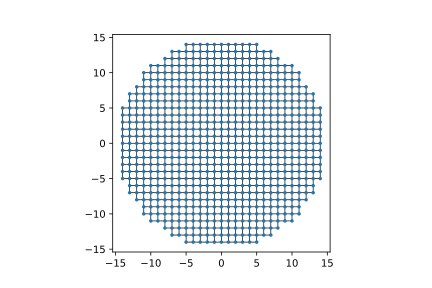

In [4]:
SVG(filename='./Jupyter/fig/disk_sq_lat.svg')


## 7 May
- Started reading *Topological Superconductivity with Deformable Magnetic Skyrmions - Garnier, Mesaros, Simon*

The reason why such a complicated magnetic texture is being researched is because it is a way to achieve p-wave coupling in a superconductor, which is reducible to Kitaev's model. Only in p-wave superconductors we find topological invariants and Majorana edge modes, but we have no evidence as of now that they exist in nature. Therefore, p-waves must be engineered and using the magnetic texture of a skyrmion, which has already been made in the lab, is one possible way of achieving this. 
The crux to achieving p-wave superconductivity is to deform the Hamiltonian in such a way that the only pairing that can happen at a certain energy is between two spin-independent electrons:
$$
\Delta_s c^{\dagger}_{k\uparrow} c^{\dagger}_{-k,\downarrow} \to \Delta_p c^{\dagger}_{k}c^{\dagger}_{-k}
$$
However, just splitting the spin values with for example a Zeeman term in the z-direction is not enough. For example, a simple Zeeman term in the z-direction would split the electrons into up- and down-spin, but since we proximitize the skyrmion with an s-wave superconductor, the electrons cannot be coupled all of sudden with the same spin (p-wave). <br>
*Not too sure about this: If two Kitaev chains with Majorana edges would be close to each other, they would be able to talk and destroy the zero-energy modes. For a simple Zeeman term there would be two copies of the Kitaev chain for a certain energy $\epsilon$ in close proximity which would destroy the zero-mode.*
$$H_B = -B_z \sigma_z c^{\dagger}_{k\sigma}c^{}_{k\sigma}$$

In [4]:
k = np.linspace(-np.pi,np.pi,200)
e_up = k**2 - 1
e_down = k**2 + 1
left,right = (k-1)**2, (k+1)**2

plot1 = hv.Overlay([hv.Path((k,e_up), kdims=['$k_z$','$\epsilon$']),hv.Path((k,e_down)),hv.HLine(0).opts(linestyle='--',color='grey'),hv.VLine(0).opts(linestyle='--', color='grey')])


plot2 = hv.Overlay([hv.Curve((k,left), kdims=['$k_x$','$\epsilon$']),hv.Curve((k,right)),hv.HLine(0).opts(linestyle='--',color='grey'),hv.VLine(0).opts(linestyle='--', color='grey')])
plot1.opts(yticks=[(0,0)],xticks=[(-np.pi, '$-\pi$'),(0, 0), (np.pi, '$\pi$')],ylim=(-2,6)) + plot2.opts(yticks=[(0,0)],xticks=[(-np.pi, '$-\pi$'),(0, 0), (np.pi, '$\pi$')], ylim=(0,6))

:Layout
   .Overlay.I  :Overlay
      .Path.I  :Path   [$k_z$,$\epsilon$]
      .Path.II :Path   [x,y]
      .HLine.I :HLine   [x,y]
      .VLine.I :VLine   [x,y]
   .Overlay.II :Overlay
      .Curve.I  :Curve   [$k_x$,$\epsilon$]   (y)
      .Curve.II :Curve   [x]   (y)
      .HLine.I  :HLine   [x,y]
      .VLine.I  :VLine   [x,y]

**_Question_**: *If we go to $\epsilon=0$ now, wouldn't you get p-wave coupling?* <br>
**_Answer_**: *No, proximitizing with an s-wave superconductor makes it impossible to immediately get coupling of electrons with equal spins*

So we have to add some spices in order to be able to get nearer to the Kitaev model --> magnetic field dependence in 3 directions
$$H_B = -B \vec{\sigma} \cdot \vec{n}$$

Now, the Zeeman splitting should create an energy gap at $k_x=0$, such that there are again two (helicity) bands which are split from each other. In the band-gap, the electrons with opposite $k$ can couple like p-waves. However, I'm not too sure about why this happens, I'll need to understand the *Aguado* review to understand the Rashba effect which enable the p-wave coupling.

## 6 May
- Finished Kitaev Chain using Kwant
- Made everything interactive with Holoviews

See <a href='https://nbviewer.jupyter.org/github/arfor/m1internship/blob/master/Jupyter/Kitaev%20Chain.ipynb'>Kitaev Chain.ipynb</a>

## 3 May
- Model Plot of Kitaev Chain just with Python
- Same model using Kwant

Whenever there is a conservation law (symmetry/invariance: time->energy, translation->momentum, rotation->anular momentum), the hamiltonian can be block diagonalised.
Then one can study the topology of the blocks independently. In sublattice symmetry, the number of levels above and below the fermi level are constant and there are no zero-energy crossings -> topologically invariant.
In particle-hole symmetry (e.g. superconductors), also the number of eigenvalues below and above zero are equal, but there exist zero-energy crossings -> there is some topology, but obviously, the number of eigenvalues below zero is not a good topological number since it doesn't change. The right topological invariant is the signature of the *Pfaffian* of the Hamiltonian, which is -1 for odd number of electrons and +1 for an even number.

> **The symmetry of the system determines the type and existence of a topological invariant**
